### K-Means
Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

Leitura dos dados

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

Verificar dados nulos

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Informações estatísticas

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Gerando gráfico da idade versus score do cliente

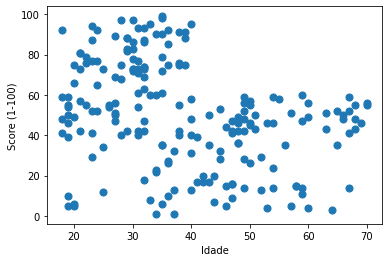

In [6]:
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=50)
plt.xlabel('Idade')
plt.ylabel('Score (1-100)')
plt.show()

### Prática
Selecione os dados de 'Age' e 'Spending Score (1-100)' no dataframe para realizar o agrupamento com k-means

In [7]:
#Selecionando no dataframe df as colunas Age e Spending Score (1-100) para que possamos utilizá-las no agrupamento com K-Means
X = df[['Age', 'Spending Score (1-100)']]

Clusterizando com k = 5

In [8]:
#Selecionando o modelo de K-Means, definindo o número de clusters para 5 e inicializando com 'k-means++', que é um método padrão no qual os centróides são gerados de tal forma que a convergência é favorecida
modeloKMeans = KMeans(n_clusters = 5, init = 'k-means++')

#Treinando e realizando as previsões pelo modelo de K-Means definido anteriormente
yKMeans = modeloKMeans.fit_predict(X)

Plote um gráfico com todos os grupos

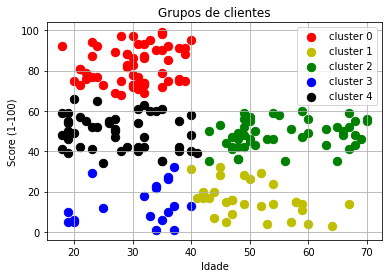

(None, <matplotlib.legend.Legend at 0x2514051bd30>, None)

In [9]:
#Atribuindo o número de grupos e definindo as cores de cada grupo
numberOfGroups = 5
colors = ['r', 'y', 'g', 'b', 'k']

#Gerando o plot do gráfico, cada grupo com uma das cores pré-definidas. No eixo X teremos a idade e no eixo Y o score de cada cliente. Ademais, o parâmetro s foi ajustado para ter um tamanho adequado no gráfico que plotaremos. Usamos, assim, um loop para que possamos utilizar os números de cada cliente para definir suas cores e apresentá-los na legenda
for k in range(numberOfGroups):
    cluster = X[yKMeans == k] 
    plt.scatter(cluster['Age'], cluster['Spending Score (1-100)'], s = 70, c = colors[k], label = f'cluster {k}')

#Gerando o gráfico, incluindo seu título, pela função plt.title(), labels de cada eixo, pelas funções plt.xlabel() e plt.ylabel()legenda pela função plt.legend() e finalmente, utilizando a função plt.show() para mostrar o gráfico gerado
plt.title('Grupos de clientes'), plt.xlabel('Idade'), plt.ylabel('Score (1-100)')
plt.grid(), plt.legend(), plt.show()